#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad**
###**Reducción de Dimensionalidad - Descomposición en Valores Singulares (SVD) y Sistemas de Recomendación**


**Autor:**

*  Cruz Mejia Kevin Brandon


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import numpy as np
import pandas as pd

from sklearn.decomposition import TruncatedSVD

#**Ejercicio-1.** 

**Matriz de Utilidad:**

Renglones: usuarios (user_ID)

Columnas los nombres de los restaurantes (name)

Entrada: Evaluaciones generales de usuarios(rating)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfrating = pd.read_csv("/content/drive/Shareddrives/IA/rating_final.csv", )  
dfgeo = pd.read_csv("/content/drive/Shareddrives/IA/geoplaces2.csv", encoding='latin-1')

print(dfrating.shape)

(1161, 5)


In [ ]:
print(dfrating.columns)
print(dfgeo.columns)
dfratingres = dfrating[['userID','placeID', 'rating']] # se seleccionan las columnas que necesitamos en ambos df
dfgeores = dfgeo[['placeID', 'name']]

Index(['userID', 'placeID', 'rating', 'food_rating', 'service_rating'], dtype='object')
Index(['placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address',
       'city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services'],
      dtype='object')


In [ ]:
# uniendo los df mediante la variable llave placeID

tabla_relacional = pd.merge(dfratingres, dfgeores, on='placeID' )
tabla_relacional

,userID,placeID,rating,name
0,U1077,135085,2,Tortas Locas Hipocampo
1,U1108,135085,1,Tortas Locas Hipocampo
2,U1081,135085,1,Tortas Locas Hipocampo
3,U1056,135085,2,Tortas Locas Hipocampo
4,U1134,135085,2,Tortas Locas Hipocampo
...,...,...,...,...
1156,U1061,132958,2,tacos los volcanes
1157,U1025,132958,1,tacos los volcanes
1158,U1097,132958,2,tacos los volcanes
1159,U1096,132958,1,tacos los volcanes


In [ ]:
#matriz de utilidad, primeros 10 registros

MU = tabla_relacional.pivot_table(values='rating', index='userID', columns='name', fill_value=0)
MU.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
idx = (tabla_relacional['name']=='Subway')
np.count_nonzero(idx)

9

In [ ]:
#tamaño de la matriz
MU.shape

(138, 129)

#**Ejercicio-2.**

In [ ]:
# Para comenzar el analisis se toma la transpuesta de la matriz de utilidad
MUT = MU.T
MUT

userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0
Cafe Chaires,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafeteria cenidet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tacos de barbacoa enfrente del Tec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos de la estacion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos los volcanes,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [ ]:
#se utilizaron 137 valores singulares

SVD = TruncatedSVD(n_components=137, random_state=1)  
SVD.fit(MUT)

num_sv = 137   # con todos los valores singulares.

print('Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum())))

Cantidad de información simplificada con los primeros 137 vectores singulares:
0.0%


#**Ejercicio-3.**

In [ ]:
num_sv = 137

SVD = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix = SVD.fit_transform(MUT)
resultant_matrix.shape

(129, 129)

In [ ]:
corrMx = np.corrcoef(resultant_matrix, )
corrMx.shape

(129, 129)

In [ ]:
me_gusta = "Subway"

names = MU.columns
names_list = list(names)
id_megusta = names_list.index(me_gusta)

id_megusta

88

In [ ]:
corr_recomienda = corrMx[id_megusta]
print(corr_recomienda.shape)
print(corr_recomienda)

(129,)
[-7.69028369e-04 -7.87822168e-05 -5.27330975e-03  8.58511349e-04
 -3.03891148e-03  3.97495832e-05 -1.54820208e-03 -5.29347145e-03
  7.27520383e-04 -1.55098452e-03 -1.84483094e-03  3.01090491e-01
 -3.06938616e-05 -3.66639157e-03 -2.28024815e-03 -1.70971180e-03
  2.66961340e-03  4.58467365e-04 -2.11449533e-03 -6.20445134e-03
  3.34268563e-03  1.16598607e-01  1.87080102e-03  2.53682556e-03
 -5.48801141e-03 -2.91288266e-03  2.02825342e-03 -1.36607265e-03
 -2.01695899e-03  1.12058244e-01 -2.36235727e-03  6.52159239e-04
  3.53495770e-03 -3.62793330e-03  1.69065407e-03 -4.51837401e-03
 -2.09301342e-03  2.34634298e-01 -3.80413494e-03 -5.11845710e-04
 -2.27148704e-03  3.88178002e-01 -2.07427108e-03 -2.29428835e-03
  1.32565455e-03  3.01002479e-01  1.71433518e-01 -3.29715354e-03
 -4.74480596e-03 -8.02527884e-04 -2.65071452e-03  1.12018889e-01
 -3.91080724e-03 -2.06369812e-03  1.16008629e-01  2.27855804e-01
  4.28342495e-04 -8.69739761e-04  6.09520875e-01 -6.43364064e-03
  4.25467169e-01 -

In [ ]:
corr_recomienda[id_megusta]

1.0

In [ ]:
nom = list(names[(corr_recomienda > .23) & (corr_recomienda < 1.00)])
corr = list(corr_recomienda[(corr_recomienda > 0.23) & (corr_recomienda < 1.0)])
lista_final = list(zip(nom, corr))
num = 0

lista_final_ord =  sorted(lista_final, key = lambda x: x[1],reverse=True)[:10] #Solo primeros 10

for n, c in lista_final_ord:
    num = num + 1
    print(num," ",n,": ", c.round(5))


1   Restaurant Teely :  0.60952
2   Vips :  0.50628
3   Rincon del Bife :  0.42982
4   Restaurant and Bar and Clothesline Carlos N Charlies :  0.42547
5   Sanborns Casa Piedra :  0.41722
6   Mariscos Tia Licha :  0.38818
7   Chilis Cuernavaca :  0.30109
8   Mikasa :  0.301
9   Restaurant los Pinos :  0.28515
10   Log Yin :  0.23463


#**Ejercicio-4.**

In [ ]:
num_sv = 10

print('Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum())))

SVD = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix = SVD.fit_transform(MUT)
resultant_matrix.shape



Cantidad de información simplificada con los primeros 10 vectores singulares:
75.6%


(129, 10)

In [ ]:
corrMx = np.corrcoef(resultant_matrix, )
corrMx.shape

(129, 129)

In [ ]:
me_gusta = "Subway"

names = MU.columns
names_list = list(names)
id_megusta = names_list.index(me_gusta)

id_megusta

88

In [ ]:
corr_recomienda = corrMx[id_megusta]
print(corr_recomienda.shape)
print(corr_recomienda)

(129,)
[-0.15064635  0.97877781 -0.1845724  -0.15983695  0.99887223 -0.07193956
 -0.01573204  0.18193487  0.02371689 -0.0721253  -0.12088734  0.99990361
 -0.06747016 -0.12881113 -0.09992082 -0.01851576  0.99669844 -0.05222151
  0.06912151 -0.2865713   0.99326413  0.9972279  -0.02609229 -0.01136617
  0.09097883  0.03500756 -0.06497314 -0.01839213 -0.07070041  0.99712923
 -0.09078034  0.07195591  0.01535248 -0.14201129  0.07756104 -0.17304099
  0.05330264  0.99939672  0.99800799  0.04505749 -0.19152571  0.99990619
  0.99897094 -0.04660154 -0.01223637  0.99987903  0.99997694 -0.16809713
  0.05646127 -0.07411778 -0.15513466  0.99795453 -0.0428533  -0.02754784
  0.99737849  0.99911926 -0.06908106 -0.0535078   0.99995595 -0.37949259
  0.99992724  0.0133778  -0.09546762 -0.04008912  0.9987684  -0.12605574
 -0.07861828  0.02977735 -0.08655958 -0.23038202 -0.23325957  0.0014082
 -0.27000998 -0.09780463  0.05936832 -0.1409088  -0.15376939  0.02895601
  0.03207908 -0.13242192 -0.12764337  0.02587

In [ ]:
corr_recomienda[id_megusta]

1.0

In [ ]:

nom = list(names[(corr_recomienda > .9) & (corr_recomienda < 1.00)])
corr = list(corr_recomienda[(corr_recomienda > 0.9) & (corr_recomienda < 1.0)])
lista_final = list(zip(nom, corr))
num = 0

lista_final_ord =  sorted(lista_final, key = lambda x: x[1],reverse=True)[:10] #Solo primeros 10

for n, c in lista_final_ord:
    num = num + 1
    print(num," ",n,": ", c.round(5))

1   Rincon del Bife :  0.99999
2   Paniroles :  0.99998
3   Restaurant Teely :  0.99996
4   Restaurant and Bar and Clothesline Carlos N Charlies :  0.99993
5   Mariscos Tia Licha :  0.99991
6   Chilis Cuernavaca :  0.9999
7   Mikasa :  0.99988
8   Vips :  0.9997
9   Log Yin :  0.9994
10   Sanborns Casa Piedra :  0.99923


**Con todos los valores singulares:**

1   Restaurant Teely :  0.60952

2   Vips :  0.50628

3   Rincon del Bife :  0.42982

4   Restaurant and Bar and Clothesline Carlos N Charlies :  0.42547

5   Sanborns Casa Piedra :  0.41722

6   Mariscos Tia Licha :  0.38818

7   Chilis Cuernavaca :  0.30109

8   Mikasa :  0.301

9   Restaurant los Pinos :  0.28515

10   Log Yin :  0.23463




**Disminucion de la dimensión:**

1   Rincon del Bife :  0.99999

2   Paniroles :  0.99998

3   Restaurant Teely :  0.99996

4   Restaurant and Bar and Clothesline Carlos N Charlies :  0.99993

5   Mariscos Tia Licha :  0.99991

6   Chilis Cuernavaca :  0.9999

7   Mikasa :  0.99988

8   Vips :  0.9997

9   Log Yin :  0.9994

10   Sanborns Casa Piedra :  0.99923

#**Ejercicio-5.**

In [ ]:
me_gusta = "tacos de barbacoa enfrente del Tec"

id_megusta = names_list.index(me_gusta)
corr_recomienda = corrMx[id_megusta]
list(names[(corr_recomienda > .9) & (corr_recomienda < 0.99)])

['Carnitas Mata  Calle 16 de Septiembre',
 'TACOS EL GUERO',
 'cafe ambar',
 'churchs',
 'tacos de la estacion',
 'tortas hawai']

In [ ]:
nom = list(names[(corr_recomienda > .9) & (corr_recomienda < 1.00)])
corr = list(corr_recomienda[(corr_recomienda > 0.9) & (corr_recomienda < 1.0)])
lista_final = list(zip(nom, corr))
num = 0

lista_final_ord =  sorted(lista_final, key = lambda x: x[1],reverse=True)[:10] #Solo primeros 10

for n, c in lista_final_ord:
    num = num + 1
    print(num," ",n,": ", c.round(5))

1   tacos abi :  0.99996
2   Taqueria EL amigo  :  0.9999
3   vips :  0.99978
4   little pizza Emilio Portes Gil :  0.9997
5   Pollo_Frito_Buenos_Aires :  0.99952
6   puesto de gorditas :  0.99943
7   carnitas_mata :  0.99941
8   palomo tec :  0.99941
9   Hamburguesas La perica :  0.99827
10   Little Cesarz :  0.99822


**Conclusiónes:** 

Basado en la calificación general dada por los usuarios, la lista de recomendaciones de restaurantes similares a "Tacos de barbacoa enfrente del Tec" es de 6. El pequeño tamaño de la lista es debido al corto rango de correlación seleccionado, mientras mayor sea dicho rango, la cantidad de restaurantes recomendados sera mayor.





#**Ejercicio-6.**

**Matriz de Utilidad:**

Renglones: usuarios (user_ID)

Columnas los nombres de los restaurantes (name)

Entrada: Evaluación a la comida(food_rating)

In [ ]:
dffoodrating = dfrating[['userID','placeID', 'food_rating']]
dfgeores_2 = dfgeo[['placeID', 'name']]

In [ ]:
tabla_relacional_2 = pd.merge(dffoodrating, dfgeores_2, on='placeID' )
tabla_relacional_2

,userID,placeID,food_rating,name
0,U1077,135085,2,Tortas Locas Hipocampo
1,U1108,135085,2,Tortas Locas Hipocampo
2,U1081,135085,2,Tortas Locas Hipocampo
3,U1056,135085,2,Tortas Locas Hipocampo
4,U1134,135085,1,Tortas Locas Hipocampo
...,...,...,...,...
1156,U1061,132958,2,tacos los volcanes
1157,U1025,132958,0,tacos los volcanes
1158,U1097,132958,1,tacos los volcanes
1159,U1096,132958,2,tacos los volcanes


In [ ]:
MU_2 = tabla_relacional_2.pivot_table(values='food_rating', index='userID', columns='name', fill_value=0)
MU_2.head(10)


name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
idx_2 = (tabla_relacional_2['name']=='Subway')
np.count_nonzero(idx_2)

9

In [ ]:
MU_2.shape

(138, 129)

In [ ]:
MUT_2 = MU_2.T
MUT_2

userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,2,0,0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0
Cafe Chaires,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafeteria cenidet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tacos de barbacoa enfrente del Tec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos de la estacion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos los volcanes,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [ ]:
#se utilizaron 137 valores singulares

SVD_2 = TruncatedSVD(n_components=137, random_state=1)  
SVD_2.fit(MUT_2)

num_sv = 137  # con todos los valores singulares 

print('Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (1- (SVD_2.singular_values_[0:num_sv]).sum() / (SVD_2.singular_values_).sum())))

Cantidad de información simplificada con los primeros 137 vectores singulares:
0.0%


In [ ]:
num_sv = 137

SVD_2 = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix_2 = SVD_2.fit_transform(MUT_2)
resultant_matrix_2.shape

(129, 129)

In [ ]:
corrMx_2 = np.corrcoef(resultant_matrix_2)
corrMx_2.shape

(129, 129)

In [ ]:
me_gusta_2 = "Subway"

names_2 = MU_2.columns
names_list_2 = list(names_2)
id_megusta_2 = names_list_2.index(me_gusta_2)

id_megusta_2

88

In [ ]:
corr_recomienda_2 = corrMx_2[id_megusta_2]
print(corr_recomienda_2.shape)
print(corr_recomienda_2)

(129,)
[-5.06418108e-03  1.53891772e-03 -7.15705294e-03 -7.51437349e-04
  3.57844065e-04 -4.27908953e-03 -4.10491062e-03 -8.72391553e-03
 -5.80659154e-03 -7.37551348e-03 -6.29677017e-03  1.19529006e-03
 -5.49056441e-03 -6.25106315e-03 -2.26808294e-04  2.26784575e-03
 -4.97923491e-03 -7.33491870e-03 -5.49091909e-05 -6.54487708e-03
 -7.17291384e-04  2.31333734e-01 -9.42653806e-04  1.15809414e-03
 -2.44343966e-03 -2.46720616e-03 -8.43368969e-04 -2.05629573e-03
 -3.70288596e-03  2.50357400e-01 -5.28927854e-03  2.72981977e-03
  4.14365709e-04 -9.51153872e-03  2.32009229e-03 -9.29532082e-03
 -4.03970901e-03  1.31858098e-01 -8.36645261e-03 -2.30125601e-03
 -2.61409620e-03  4.15222053e-01  4.25538306e-03  3.02880631e-03
 -2.46282020e-03  2.09493113e-01  3.12082362e-01 -3.01154158e-03
 -3.10972278e-04 -1.11824996e-03  8.07121501e-04  2.24213782e-01
  2.65096107e-04  6.44807197e-04  2.32708368e-01  3.31706780e-01
  6.95063851e-04  3.47994174e-04  8.16413374e-01  1.04699730e-04
  4.68949686e-01  

In [ ]:
nom = list(names_2[(corr_recomienda_2 > .23) & (corr_recomienda_2 < 1.00)])
corr = list(corr_recomienda_2[(corr_recomienda_2 > 0.23) & (corr_recomienda_2 < 1.0)])
lista_final_2 = list(zip(nom, corr))
num = 0

lista_final_ord_2 =  sorted(lista_final_2, key = lambda x: x[1],reverse=True)[:10] #Solo primeros 10

for n, c in lista_final_ord_2:
    num = num + 1
    print(num," ",n,": ", c.round(5))

1   Restaurant Teely :  0.81641
2   Restaurant and Bar and Clothesline Carlos N Charlies :  0.46895
3   Vips :  0.44215
4   Mariscos Tia Licha :  0.41522
5   Rincon del Bife :  0.38182
6   Sanborns Casa Piedra :  0.36566
7   Restaurant Las Mananitas :  0.33171
8   Paniroles :  0.31208
9   Kiku Cuernavaca :  0.25036
10   Restaurant Familiar El Chino :  0.23271


In [ ]:
#Reducción de dimensionalidad
num_sv = 72

print('Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (1- (SVD_2.singular_values_[0:num_sv]).sum() / (SVD_2.singular_values_).sum())))

SVD_2 = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix = SVD_2.fit_transform(MUT_2)
resultant_matrix.shape

Cantidad de información simplificada con los primeros 72 vectores singulares:
13.5%


(129, 72)

In [ ]:
corrMx = np.corrcoef(resultant_matrix, )
corrMx.shape

(129, 129)

In [ ]:
corr_recomienda_2 = corrMx[id_megusta_2]
print(corr_recomienda_2.shape)
print(corr_recomienda_2)

(129,)
[-1.23226869e-02  3.64461198e-02 -1.27114214e-02  3.22168928e-05
 -3.41356472e-02 -8.23617179e-03 -7.53119240e-03 -8.22710219e-03
 -1.00888278e-02 -6.23847733e-03 -1.29210855e-02 -2.81821480e-02
 -1.08095220e-02 -1.11869921e-02  2.48315753e-04  4.80180326e-03
 -2.19733792e-02 -1.23428785e-02 -7.13183993e-04 -1.14259264e-02
  9.59735481e-03  2.27096533e-01 -5.28510157e-04  3.54613006e-03
 -4.73191878e-03 -4.67395980e-03 -2.06037769e-03 -1.62204999e-03
 -7.16003161e-03  2.49148551e-01 -8.93502543e-03  3.20798688e-03
  8.84824705e-04 -1.50450515e-02  5.05937057e-03 -1.48331905e-02
 -5.63837562e-03  1.20364173e-01  2.94358503e-02 -4.60345609e-03
 -5.90153499e-03  4.35865846e-01  3.89640388e-03  5.71772820e-03
 -3.70125412e-03  2.68368663e-01  3.17280861e-01 -5.54274452e-03
  2.62306602e-03 -1.50696959e-03 -2.36573012e-04  2.20301376e-01
  1.92035338e-04  3.72479220e-03  2.52092146e-01  3.34546660e-01
  2.67792507e-05  1.80653309e-03  8.81233763e-01 -6.98251266e-04
  5.13690719e-01  

In [ ]:
nom = list(names_2[(corr_recomienda_2 > .23) & (corr_recomienda_2 < 1.00)])
corr = list(corr_recomienda_2[(corr_recomienda_2 > 0.23) & (corr_recomienda_2 < 1.0)])
lista_final_2 = list(zip(nom, corr))
num = 0

lista_final_ord_2 =  sorted(lista_final_2, key = lambda x: x[1],reverse=True)[:10] #Solo primeros 10

for n, c in lista_final_ord_2:
    num = num + 1
    print(num," ",n,": ", c.round(5))

1   Restaurant Teely :  0.88123
2   Restaurant and Bar and Clothesline Carlos N Charlies :  0.51369
3   Rincon del Bife :  0.47501
4   Vips :  0.44869
5   Mariscos Tia Licha :  0.43587
6   Sanborns Casa Piedra :  0.38441
7   Restaurant Las Mananitas :  0.33455
8   Paniroles :  0.31728
9   Mikasa :  0.26837
10   Restaurant Familiar El Chino :  0.25209


**Con todos los valores singulares**

1   Restaurant Teely :  0.81641

2   Restaurant and Bar and Clothesline Carlos N Charlies :  0.46895

3   Vips :  0.44215

4   Mariscos Tia Licha :  0.41522

5   Rincon del Bife :  0.38182

6   Sanborns Casa Piedra :  0.36566

7   Restaurant Las Mananitas :  0.33171

8   Paniroles :  0.31208

9   Kiku Cuernavaca :  0.25036

10   Restaurant Familiar El Chino :  0.23271




**Disminucion de la dimensión**

1   Restaurant Teely :  0.88123

2   Restaurant and Bar and Clothesline Carlos N Charlies :  0.51369

3   Rincon del Bife :  0.47501

4   Vips :  0.44869

5   Mariscos Tia Licha :  0.43587

6   Sanborns Casa Piedra :  0.38441

7   Restaurant Las Mananitas :  0.33455

8   Paniroles :  0.31728

9   Mikasa :  0.26837

10   Restaurant Familiar El Chino :  0.25209

### **Conclusiones:**

Usando la calificación a la comida(food_rating) para recomendar restaurantes similares a "Subway", se obtuvo una lista de 10 sugerencias con un intervalo de correlación entre 0.23 y < 1. Tras aplicar la reducción de dimensionalidad a 72 vectores, la cantidad de información simplificada fue de 13.5%. En ambas listas hay dos restaurantes que guardan la mayor correlacion con "Subway":

1. Restaurant Teely

2. Restaurant and Bar and Clothesline Carlos N Charlies


Los restaurantes anteriormente listados, tienen altas probabilidades de ser del interés del cliente que evaluó positivamente a Subway en la calidad de comida.

#**Ejercicio-7.**

**Matriz de Utilidad:**

Renglones: usuarios (user_ID)

Columnas los nombres de los restaurantes (name)

Entrada: Evaluación del servicio(service_rating)

In [ ]:
dfservicerating = dfrating[['userID','placeID', 'service_rating']]
dfgeores_3 = dfgeo[['placeID', 'name']]

In [ ]:
tabla_relacional_3 = pd.merge(dfservicerating, dfgeores_3, on='placeID' )
tabla_relacional_3

,userID,placeID,service_rating,name
0,U1077,135085,2,Tortas Locas Hipocampo
1,U1108,135085,1,Tortas Locas Hipocampo
2,U1081,135085,1,Tortas Locas Hipocampo
3,U1056,135085,2,Tortas Locas Hipocampo
4,U1134,135085,2,Tortas Locas Hipocampo
...,...,...,...,...
1156,U1061,132958,2,tacos los volcanes
1157,U1025,132958,0,tacos los volcanes
1158,U1097,132958,1,tacos los volcanes
1159,U1096,132958,2,tacos los volcanes


In [ ]:
MU_3 = tabla_relacional_3.pivot_table(values='service_rating', index='userID', columns='name', fill_value=0)
MU_3.head(10)


name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
idx_3 = (tabla_relacional_3['name']=='Subway')
np.count_nonzero(idx_3)

9

In [ ]:
MU_3.shape

(138, 129)

In [ ]:
MUT_3 = MU_3.T
MUT_3

userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
Cafe Chaires,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafeteria cenidet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tacos de barbacoa enfrente del Tec,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos de la estacion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tacos los volcanes,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [ ]:

SVD_3 = TruncatedSVD(n_components=137, random_state=1)  
SVD_3.fit(MUT_3)

num_sv = 137  # con todos los valores singulares 

print('Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (1- (SVD_3.singular_values_[0:num_sv]).sum() / (SVD_3.singular_values_).sum())))

Cantidad de información simplificada con los primeros 137 vectores singulares:
0.0%


In [ ]:
num_sv = 137

SVD_3 = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix_3 = SVD_3.fit_transform(MUT_3)
resultant_matrix_3.shape

(129, 129)

In [ ]:
corrMx_3 = np.corrcoef(resultant_matrix_3)
corrMx_3.shape

(129, 129)

In [ ]:
me_gusta_3 = "Subway"

names_3 = MU_3.columns
names_list_3 = list(names_3)
id_megusta_3 = names_list_3.index(me_gusta_3)

id_megusta_3

88

In [ ]:
corr_recomienda_3 = corrMx_3[id_megusta_3]
print(corr_recomienda_3.shape)
print(corr_recomienda_3)

(129,)
[-2.91095724e-04 -3.60361693e-03  4.17542463e-03  5.49600644e-03
  8.22025821e-03  9.26584331e-04 -1.84324856e-04  2.08477911e-02
  4.16661248e-04  5.49213204e-03 -9.83321202e-03  2.30697829e-01
 -7.71002964e-04 -7.78964069e-03  4.28478573e-03 -1.96660815e-03
  6.46627016e-03  1.22858323e-02  5.23591750e-03 -3.37285475e-03
  4.22033518e-03  1.92759594e-01  3.25932626e-03  1.31225788e-02
  1.02856131e-02  1.08386707e-02 -2.32136875e-03  9.93522146e-03
 -8.13035667e-03  1.78740094e-01  1.27492522e-03  4.01749269e-03
  9.93395882e-03  1.06861306e-02  1.08193009e-02  6.49374214e-03
  2.57816306e-03  1.10159929e-02  1.62133585e-02  9.40455020e-03
  1.04115070e-02  1.39761855e-01  4.95429442e-03  1.01065382e-02
  7.45513647e-03  1.62758051e-02  3.65933684e-01 -4.53806898e-03
  1.94095851e-03  6.28735982e-03  7.08759527e-03  4.35778543e-03
  7.61149284e-03  6.86889327e-03  1.82869479e-01  2.26266242e-01
  8.41417946e-03 -1.38744406e-02  7.72973139e-01  2.58304203e-04
  6.00160625e-01  

In [ ]:
nom = list(names_3[(corr_recomienda_3 > .1) & (corr_recomienda_3 < 0.999999)])
corr = list(corr_recomienda_3[(corr_recomienda_3 > 0.1) & (corr_recomienda_3 < 0.999999)])
lista_final_3 = list(zip(nom, corr))
num = 0

lista_final_ord_3 =  sorted(lista_final_3, key = lambda x: x[1],reverse=True)[:10] #Solo primeros 10

for n, c in lista_final_ord_3:
    num = num + 1
    print(num," ",n,": ", c.round(5))

1   Restaurant Teely :  0.77297
2   Restaurant and Bar and Clothesline Carlos N Charlies :  0.60016
3   Rincon del Bife :  0.51873
4   Vips :  0.4212
5   Paniroles :  0.36593
6   Chilis Cuernavaca :  0.2307
7   Restaurant Las Mananitas :  0.22627
8   Giovannis :  0.19276
9   Restaurant Familiar El Chino :  0.18287
10   Kiku Cuernavaca :  0.17874


In [ ]:
#Reducción de dimensionalidad
num_sv = 50

print('Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (1- (SVD_3.singular_values_[0:num_sv]).sum() / (SVD_3.singular_values_).sum())))

SVD_3 = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix_3 = SVD_3.fit_transform(MUT_3)
resultant_matrix_3.shape

Cantidad de información simplificada con los primeros 50 vectores singulares:
27.4%


(129, 50)

In [ ]:
corrMx_3 = np.corrcoef(resultant_matrix_3, )
corrMx_3.shape

(129, 129)

In [ ]:
corr_recomienda_3 = corrMx_3[id_megusta_3]
print(corr_recomienda_3.shape)
print(corr_recomienda_3)

(129,)
[-2.61143610e-03  9.05248727e-02  8.98184206e-03  1.14678069e-02
  5.64560314e-02 -5.01598225e-05  4.26102555e-03  1.53345599e-02
 -7.30576054e-03  1.92868909e-03 -8.56681512e-03  2.32122930e-01
 -4.78321429e-03 -1.00095617e-02  6.44899022e-03 -8.26573168e-03
  1.10690070e-01  1.62359642e-02  1.20087285e-02 -5.63256189e-03
  4.12158516e-04  2.89558124e-01  6.85234021e-03  1.73525348e-02
  1.35810454e-02  1.02078934e-02  9.08137712e-03  1.48237289e-02
 -1.18413296e-02  1.85398117e-01 -1.74610180e-03  5.54716781e-03
  1.64362735e-02  7.33711877e-03  1.48200366e-02  8.12098373e-03
 -2.60129343e-04  2.57626193e-02  1.22418515e-01  1.23079719e-02
  1.62331510e-02  1.84623190e-01 -1.55170190e-01  1.32673003e-02
  7.90468412e-03  8.69836927e-02  5.45326987e-01 -5.31829586e-03
  2.50308004e-02  1.01696740e-02  9.73561625e-03  3.20810230e-02
  7.22811865e-03  1.28593599e-02  1.78752744e-01  2.34535629e-01
  1.37558947e-02 -1.64713058e-02  9.57853566e-01 -2.58371076e-03
  8.77079066e-01  

In [ ]:
list(names_3[(corr_recomienda_3 > .90) & (corr_recomienda_3 < 0.999999)])[:10]

['Restaurant Teely']

In [ ]:
nom = list(names_3[(corr_recomienda_3 > .1) & (corr_recomienda_3 < 0.999999)])
corr = list(corr_recomienda_3[(corr_recomienda_3 > 0.1) & (corr_recomienda_3 < 0.999999)])
lista_final_3 = list(zip(nom, corr))
num = 0

lista_final_ord_3 =  sorted(lista_final_3, key = lambda x: x[1],reverse=True)[:10] #Solo primeros 10

for n, c in lista_final_ord_3:
    num = num + 1
    print(num," ",n,": ", c.round(5))

1   Restaurant Teely :  0.95785
2   Restaurant and Bar and Clothesline Carlos N Charlies :  0.87708
3   Rincon del Bife :  0.69839
4   Paniroles :  0.54533
5   Vips :  0.45651
6   Giovannis :  0.28956
7   Restaurant Las Mananitas :  0.23454
8   Chilis Cuernavaca :  0.23212
9   Kiku Cuernavaca :  0.1854
10   Mariscos Tia Licha :  0.18462


**Con todos los valores singulares**

1   Restaurant Teely :  0.77297

2   Restaurant and Bar and Clothesline Carlos N Charlies :  0.60016

3   Rincon del Bife :  0.51873

4   Vips :  0.4212

5   Paniroles :  0.36593

6   Chilis Cuernavaca :  0.2307

7   Restaurant Las Mananitas :  0.22627

8   Giovannis :  0.19276

9   Restaurant Familiar El Chino :  0.18287

10   Kiku Cuernavaca :  0.17874





**Disminucion de la dimensión**

1   Restaurant Teely :  0.95785

2   Restaurant and Bar and Clothesline Carlos N Charlies :  0.87708

3   Rincon del Bife :  0.69839

4   Paniroles :  0.54533

5   Vips :  0.45651

6   Giovannis :  0.28956

7   Restaurant Las Mananitas :  0.23454

8   Chilis Cuernavaca :  0.23212

9   Kiku Cuernavaca :  0.1854

10   Mariscos Tia Licha :  0.18462

### **Conclusiones:**

Usando la calificación del servicio(service_rating) para recomendar restaurantes similares a "Subway", se obtuvo una lista de 10 restaurantes cuyas correlaciones varian entre 0.1 y 0.999999. Tras aplicar la disminución de dimensionalidad a 50 vectores, la cantidad de información simplificada fue de 27.4% y tambien se encuentran coincidencias en los 3 primeras recomendaciones con modelo que usa todos los valores singuales, las cuales se enuncian a continuación:

1 Restaurant Teely

2 Restaurant and Bar and Clothesline Carlos N Charlies

3 Rincon del Bife

Los restaurantes anteriormente listados, tienen altas probabilidades de ser del interés del cliente que evaluó positivamente a Subway en la calidad del servicio.

#**Ejercicio-8.**

### **Conclusiones Finales**

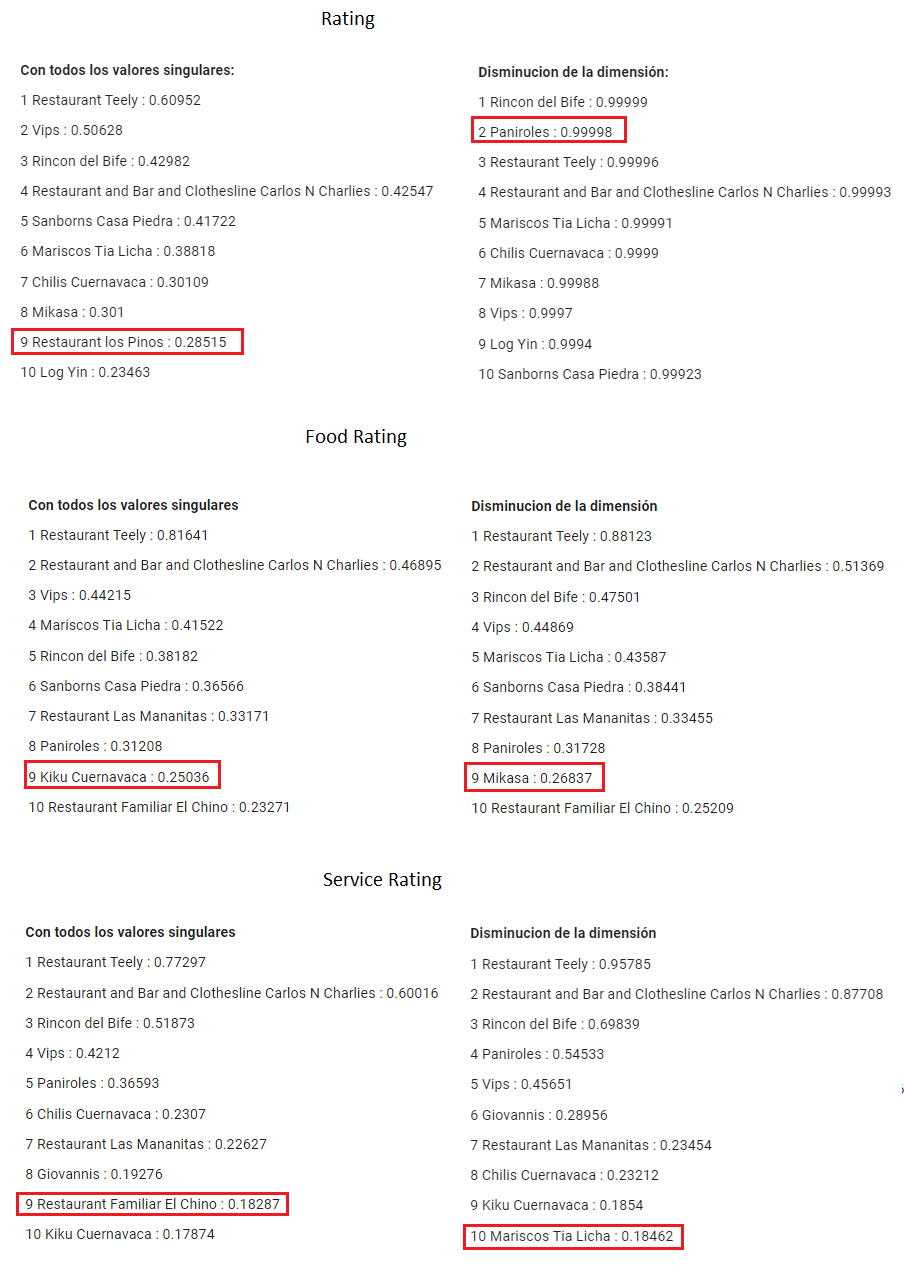



De acuerdo a las recomendaciones dadas por los modelos (con todos los valores singulares y con reduccion de dimensionalidad), se puede determinar que de las 10 principales coincidencias, 9 de ellas se repiten en ambos casos, es decir que con una reduccion de dimensiones de las variables independientes se logra un resultado similiar haciendo el modelo mucho mas eficiente, ya que debe procesar un menor número de datos. Adicionalmente es importante mencionar que para generar las 10 recomendaciones y dependiendo del numero vectores princiaples el rango de correlación puede ser variable (entre más ajustado menor número de recomendaciones).

Por otro lado, cada modelo ofrece diferentes recomendaciones basadas en sus propios parámetros de “calidad”, por lo que detectamos restaurantes que son muy recurrentes en los 3 modelos:

1.	Restaurant and Bar and Clothesline Carlos N Charlies
2.	Restaurant Teely
3.	Rincon del Bife
4.	Vips

Se puede asumir que los restaurantes previamente mencionados tienen altas probabilidades de ser del interés del usuario que evaluó bien a “Subway” en las distintas métricas: puntaje general, comida y servicio.

Los modelos de recomendación son una gran herramienta para mejorar la experiencia de usuario, ya que ayuda a los clientes a encontrar de forma más fácil y rápida lo que buscan o descubrir nuevos productos basados en sus intereses, lo cual se traduce en una mayor satisfacción del servicio y mejora el “customer engagement”.


###**Fin de la Actividad de la semana 10 - Sistemas de Recomendación y Reducción de Dimensionalidad con SVD.**